<div style="text-align:center">Marco Seiz, Michael Kellner, Anastasia August<br>
KIT, Institut für Angewandte Materialien (IAM)<br>
Computational Materials Science (CMS)
</div>
<h1>Mikrostruktursimulation <br/>Lösung zur Rechnerübung Grundlagen Mathematik WS 20/21</h1>

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import numpy as np
mpl.rcParams.update({'font.size': 16})
mpl.rcParams['figure.figsize'] = (9,6)
mpl.rcParams['axes.grid'] = True
from sympy import *
import time
from numba import jit

init_printing()

In [2]:
import os

In [3]:
# Im Jupyterhub: Die Datei via File -> Save as "MSSub02_Math_18Nov20_L.ipynb" in Ihr Home kopieren
os.getcwd() # falls auf dem Jupyterhub hier nicht etwas mit /home steht: Kernel -> Shutdown -> Restart

'/home/marcos'

<h3>Aufgabe 1 a)<br>
Analytische Lösung</h3>

Gegeben ist die Funktion $f = exp(x+1)$. Definieren Sie diese Funktion und bestimmen Sie die analytische Ableitung mit Hilfe von sympy. Geben Sie den Wert der Ableitung an der Stelle $x=1$ an.

In [4]:
x = symbols('x') 
x_pos = \
1 
f = \
Lambda(x, exp(x+1)) # hier mit Lambda(x, expr), damit direkt als Funktion aufrufbar
display(f)
df = \
Lambda(x, diff(f(x),x))
display(df)
print("Symbolische Berechnung:")
symb = \
df(1) 
display(symb)
evaluated = \
N(symb) 
print("exakte Lösung: %e" % (evaluated))

Symbolische Berechnung:


exakte Lösung: 7.389056e+00


<h3>Aufgabe 1 b)<br>
zu implementierende Verfahren</h3>

Es sollen nun mehrere numerische Verfahren zur Näherung der Ableitung untersucht werden. Die Verfahren basieren darauf, die Steigung der Funktion über Stützpunkte zu bestimmen.

Implementieren Sie die folgenden Verfahren in den vordefinierten Funktionen und berechnen sie wiederum die Ableitung
an der Stelle $x=1$ für jedes Verfahren. Der Wert hinter `return` wird von der Funktion zurückgegeben.

1. Rückwärtsdifferenz 1. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}$$
2. Vorwärtsdifferenz 1. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}$$
3. Zentrale Differenz 2. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{f(x_{i+1})-f(x_{i-1})}{x_{i+1}-x_{i-1}}$$
4. Rückwärtsdifferenz 3. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{11 f(x_{i})- 18 f(x_{i-1}) + 9 f(x_{i-2}) -2 f(x_{i-3})}{3(x_{i+1}-x_{i-1})}$$
5. Zentrale Differenz 4. Ordnung $$\frac{\partial f(x)}{\partial x} \approx \frac{-f(x_{i+2}) + 8 f(x_{i+1}) - 8 f(x_{i-1}) +f(x_{i-2})}{6(x_{i+1}-x_{i-1})}$$

In [5]:
dx = 1.0/100.0
def diff_rueck_1_ordn(dx):
    return \
    (f(x_pos) - f(x_pos-dx))/dx 
    # (f.subs(x, x_pos) - f.subs(x, x_pos-dx) /dx # alternativ ohne Lambda 
print("Rückwärtsdifferenz %e"%N(diff_rueck_1_ordn(dx)))

Rückwärtsdifferenz 7.352234e+00


In [6]:
def diff_vor_1_ordn(dx):
    return \
(f(x_pos) - f(x_pos-dx))/dx 
print("Vorwärtsdifferenz %e"%N(diff_vor_1_ordn(dx)))

Vorwärtsdifferenz 7.352234e+00


In [7]:
def diff_zentral_2_ordn(dx):
    return \
(f(x_pos+dx)-f(x_pos-dx))/(2*dx)
print("Zentraldifferenz 2. Ordnung %e"%N(diff_zentral_2_ordn(dx)))

Zentraldifferenz 2. Ordnung 7.389179e+00


In [8]:
def diff_rueck_3_ordn(dx):
    return \
(11*f(x_pos)-18*f(x_pos-dx)+9*f(x_pos-2*dx)-2*f(x_pos-3*dx))/(6*dx) 
print("Rückwärtsdifferenz 3. Ordnung %e"%N(diff_rueck_3_ordn(dx)))

Rückwärtsdifferenz 3. Ordnung 7.389054e+00


In [9]:
def diff_zentral_4_ordn(dx):
    return \
(-f(x_pos+2*dx)+8*f(x_pos+dx)-8*f(x_pos-dx)+f(x_pos-2*dx))/(12*dx) 
print("Zentraldifferenz 4. Ordnung %e"%N(diff_zentral_4_ordn(dx)))

Zentraldifferenz 4. Ordnung 7.389056e+00


<h3>Aufgabe 1 c)<br>
Fehlerverlauf Plotten</h3>
Vervollständigen Sie die <b>err</b> Funktion so, dass diese die Differenz $|f'-f'_{\text{num}}|$ zwischen der analytischen $f'$ und dem numerischen Verfahren $f'_{\text{num}}$ zurückliefert. Füllen Sie mit Hilfe der <b>for-</b> Schleife das Array <b>k</b> mit den Werten $2^{-i}$, wobei $i$ den Index des Arrays darstellt. Aktivieren Sie anschließend die plot funktion um sich die Ergebnise grafisch darstellen zu lassen.

Visualisieren Sie die numerischen Fehler und diskutieren Sie die Ergebnisse. Was sagt die Steigung im Diagramm aus? Wie sieht es ohne doppellogarithmitsche Auftragung aus?

Die Steigung entspricht der Ordnung des Verfahrens. 

<IPython.core.display.Javascript object>


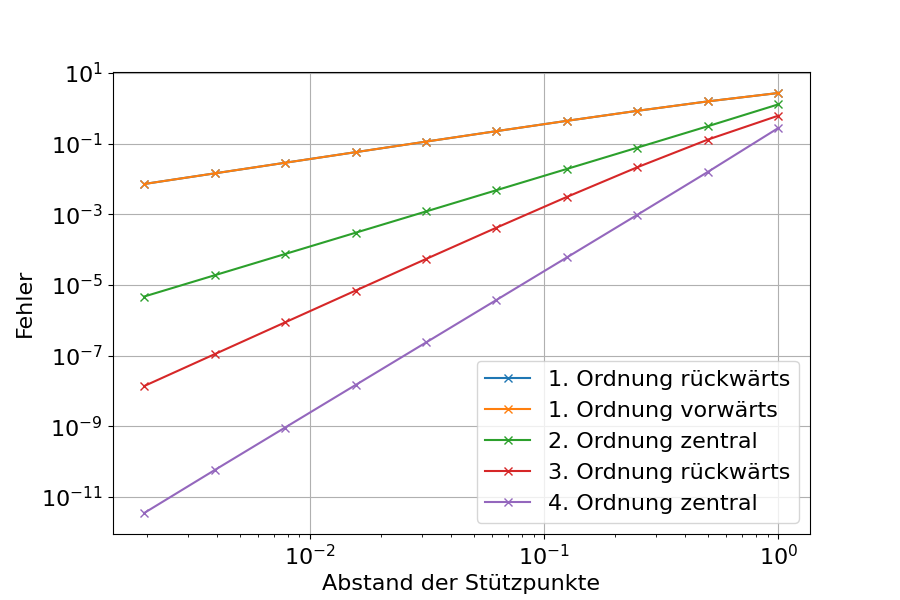

In [10]:
K = 10
err = np.zeros(K)


# Fehlerfunktion
def err(calc_method, dx):
    ret = \
    abs( N(calc_method(dx) - df(1)) )    
    return ret

# Abstand der Gitterpunkte
k = np.zeros(K)
for i in range(0,K):   
    k[i] = 2**(-i)     
#k = [2**(-i) for i in range(0,len(k))] #alternativ 



fig_dxErr, ax_dxErr = plt.subplots()

# Setze beide Skalen zu logarithmischen Skalen
ax_dxErr.set_yscale('log')
ax_dxErr.set_xscale('log')
ax_dxErr.set_xlabel("Abstand der Stützpunkte")
ax_dxErr.set_ylabel("Fehler")
ax_dxErr.plot(k,[err(diff_rueck_1_ordn,i) for i in k],"-x", label='1. Ordnung rückwärts')
ax_dxErr.plot(k,[err(diff_vor_1_ordn,i) for i in k],"-x", label='1. Ordnung vorwärts')
ax_dxErr.plot(k,[err(diff_zentral_2_ordn,i) for i in k],"-x", label='2. Ordnung zentral')
ax_dxErr.plot(k,[err(diff_rueck_3_ordn,i) for i in k],"-x", label='3. Ordnung rückwärts')
ax_dxErr.plot(k,[err(diff_zentral_4_ordn,i) for i in k],"-x", label='4. Ordnung zentral')
ax_dxErr.legend(ncol=1);

<h3>Aufgabe 2</h3>

Gegeben ist die eindimensionale Diffusionsgleichung
$$ \frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}.$$
Diese Gleichung soll nun numerisch mit verschiedenen Verfahren gelöst werden. Der Wert der Diffusionskonstanten $D$ beträgt 1, die Raumschrittweite $\Delta x$ sei 1 und es sollen 50 Gitterpunkte zur Auflösung des Gebiets verwendet werden.

In [11]:
# Simulations- und Diskretisierungsparameter
D=1
deltax=1
invDeltaxSq=1/(deltax*deltax) 
gridpoints=50 # mit Randpunkten
# Zeitschrittweite für das explizite Verfahren
deltat_explicit=0.5

<h3>2 a) Explizites Eulerverfahren</h3>

Implementieren Sie die Berechnung der zweiten Ableitung mit zentralen Differenzen zweiter Ordnung für ein Skalarfeld und darauf aufbauend die Zeitintegration mit Hilfe des expliziten Eulerverfahrens erster Ordnung.

Hinweis: Es ist hilfreich, sich die diskretisierte Form der Gleichung aufzuschreiben. 

In [12]:
# Berechnung der zweiten räumliche Ableitung von c an der Stelle i
# Hinweis: Das i-te Element eines Arrays ist über c[i] verfügbar.
#@jit
def diff2Ord2(c, i):
    return  \
    (c[i-1] - 2*c[i] + c[i+1])*invDeltaxSq     
    
# Zeitintegration mit dem expliziten Eulerverfahren
#@jit
def explEuler1Ord(cold, cnew):
    length = cold.shape[0]
    start = 1
    end = length-1
    for i in range(start, end):
        cnew[i] = \
        cold[i] + D*deltat_explicit * diff2Ord2(cold, i) 
        

<h3>2 b) Rand- und Anfangsbedingungen</h3>

Für die Lösung des Anfangsrandwertproblems sind Anfangs- und Randbedingungen notwendig. Implementieren Sie die folgendenen Bedingungen:

Dirichlet-Randbedingung am linken Rand: $c(0,t) = 0$

Dirichlet-Randbedingung am rechten Rand: $c(L,t) = 1$

Anfangsbedingung: $c(x,0) = 0$

In [13]:
# Randbedingungen mit dem Ansatz über ghost- oder halo-Zellen; in diesen Zellen wird später nicht gerechnet
# Hinweis: a[-1] ist das letzte Element von a, entspricht also dem rechten Rand
def bcs(c):
    c[0] = \
    0 
    c[-1] = \
    1 

# Anfangsbedingungen
# Hinweis: a[:] entspricht allen Elementen von a
def ini(c):
    c[:] = \
    0 
        

<h3>2 c) Simulation und Analyse</h3>

Lösen sie nun die Gleichung numerisch für eine Zeitschrittweite von $\Delta t=0.5$. Was für ein Zustand wird annähernd erreicht?

Stationärer Zustand 

Setzen Sie nun die Zeitschrittweite auf $\Delta t=0.51$. Wie verändert sich die Lösung und warum?

Es treten numerische Instabilitäten auf, die zu einer divergierenden Lösung führen. Explizite Verfahren sind nur bedingt stabil, vgl. http://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/html/._diffu001.html#diffu:pde1:analysis:details . 



In [14]:
# Initialisieren der Felder
cold=np.zeros(gridpoints)
cnew=np.zeros(gridpoints)
ini(cold)
framelist_e=[]
times_e=[]

In [15]:
#Simulation
goaltime = gridpoints*15
print("Zielzeit ist %lf" % (goaltime))
timesteps=int(goaltime/deltat_explicit)
writefreq=int(timesteps/5) 
bcs(cold)
start = time.time()
for i in range(timesteps+1):
    if i%writefreq == 0:
        framelist_e.append(cold.copy())
        times_e.append(i*deltat_explicit)
    explEuler1Ord(cold, cnew)
    bcs(cnew)
    cold, cnew = cnew, cold
end = time.time()
print("Laufzeit: %f Sekunden" % (end-start))

Zielzeit ist 750.000000
Laufzeit: 0.151312 Sekunden


<IPython.core.display.Javascript object>


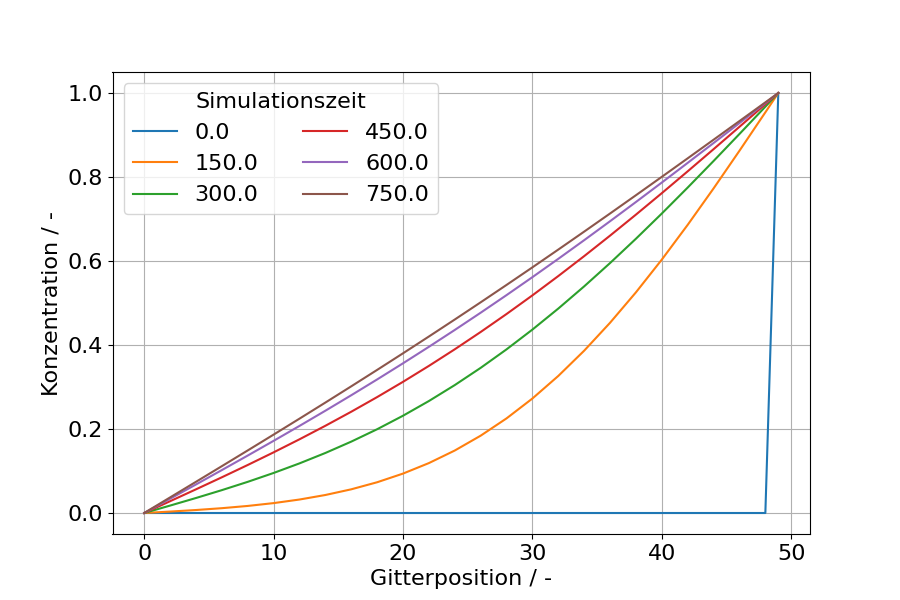

In [16]:
fig_e, ax_e = plt.subplots()
for i in range(len(framelist_e)):
    ax_e.plot(framelist_e[i], label="%.1f" % (times_e[i]))
    
ax_e.set_xlabel("Gitterposition / -")
ax_e.set_ylabel("Konzentration / -")

ax_e.legend(ncol=2,title="Simulationszeit")
fig_e.savefig("konzentration_dt05.pdf") 
# Hier können Sie den Dateinamen zum Speichern eingeben. 
# Speichern Sie die Ergebnisse unterschiedlicher Zeitschrittweiten in unterschiedlichen PDF-Dateien ab,
# damit Sie diese visuell vergleichen können.

<h3>2 d) Implizites Eulerverfahren</h3>

Implementieren Sie nun das implizite Eulerverfahren. Es gilt:

$$ \frac{c^{n+1}_{i} - c^{n}_{i}}{\Delta t} = D \frac{c_{i+1}^{n+1} - 2c_{i}^{n+1} + c_{i-1}^{n+1}}{\Delta x^2}$$

Bestimmen Sie zunächst die Matrix $A$ in

$$ A \vec{c}^{n+1} = \vec{c}^{n}  $$

wobei die Vektoren $\vec{c}$ das eindimensionale Konzentrationsfeld zu den Zeitschritten $n$ und $n+1$ darstellen. Sie können die Struktur der Matrix $A$ aus einem Beispiel mit 3 Feldpunkten (inklusive Rändern) bestimmen.


In [17]:
# Zeitschrittweite und charakteristische Zahl des Problems für das implizite Verfahren
deltat_implicit = 0.5
alpha = D*deltat_implicit / (deltax**2)


In [18]:
# Berechnung der inneren Zellen
A = np.zeros([gridpoints, gridpoints])
for i in range(1,gridpoints-1):
    A[i, i] = \
    1 + 2*alpha 
    A[i, i - 1] = \
    -alpha 
    A[i, i + 1] = \
    -alpha 
# Fixe Dirichlet-Randbedingungen werden direkt in der Matrix abgebildet
A[0,0]=1 
A[-1, -1]=1


Wie berechnet sich nun der neue Zeitschritt?

In [19]:
# Ainv=\
#    np.linalg.inv(A) 
# Zeitintegration mit dem implizitem Eulerverfahren
# Die Lösung x eines linearen Gleichungssystem Ax=b lässt sich mit np.linalg.solve(A, b) bestimmen.
# Alternativ lässt sich die Inverse in diesem Fall vor der Funktion berechnen mit Ainv=np.linalg.inv(A)
# und der neue Zeitschritt über Matrixmultiplikation (np.matmul(Ainv, cold)) bestimmen.
#@jit
def implEuler2Ord(cold, cnew):
    cnew[:] = \
    np.linalg.solve(A, cold) 
    #np.matmul(Ainv, cold) 
    
    
    


<h3> 2 e) Simulation und Analyse </h3>

Lösen sie nun die Gleichung numerisch für eine Zeitschrittweite von $\Delta t=0.5$. Unterscheidet sich die Lösung von der des expliziten Verfahrens mit selber Zeitschrittweite? Wie verhält sich die Lösung bei größeren Zeitschrittweiten? Vergleichen und erklären Sie die Unterschiede zum expliziten Verfahren bei $\Delta t > 0.5$.

Bei gleicher Zeitschrittweite gibt es keinen visuellen Unterschied zwischen den Verfahren. 

Das implizite Verfahren bleibt auch bei $\Delta t > 0.5$ stabil, da es unbedingt stabil ist, vgl. https://de.wikipedia.org/wiki/Implizites_Euler-Verfahren . 

In [20]:
#Initialisieren der Felder
ini(cold)
bcs(cold) # die Randbedingungen müssen initial auf das Feld aufgeprägt werden
framelist_i=[]
times_i=[]

In [21]:
#Simulation
timesteps=int(goaltime/deltat_implicit)
print("Zielzeit ist %lf" % (goaltime))
writefreq=int(timesteps/5)

start=time.time()
for i in range(timesteps+1):
    if i%writefreq == 0:
        framelist_i.append(cold.copy())
        times_i.append(i*deltat_implicit)
    implEuler2Ord(cold, cnew)
    cold, cnew = cnew, cold
end = time.time()
print("Laufzeit: %f Sekunden" % (end-start))

Zielzeit ist 750.000000
Laufzeit: 0.238033 Sekunden


<IPython.core.display.Javascript object>


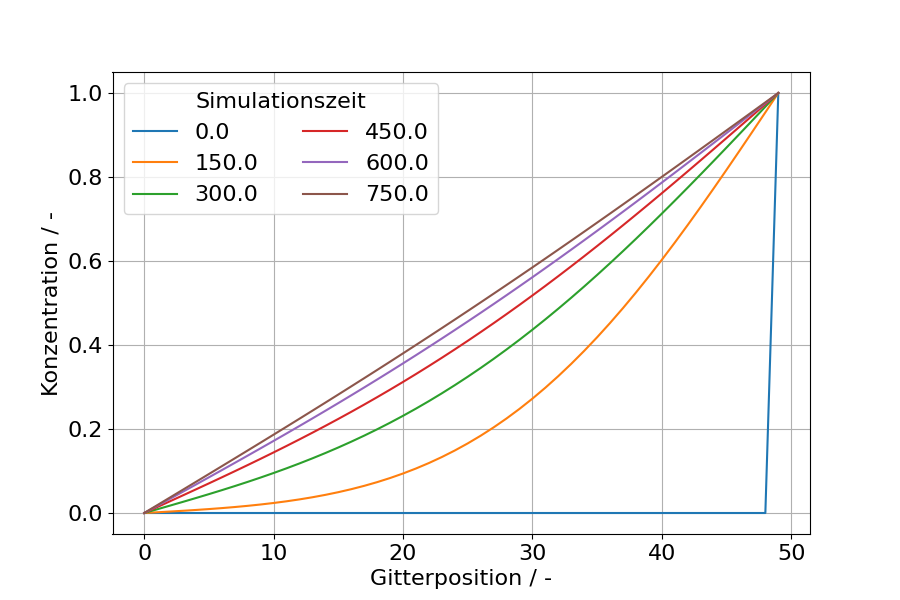

In [22]:
fig_i, ax_i = plt.subplots()
for i in range(len(framelist_i)):
    ax_i.plot(framelist_i[i], label="%.1f" % (times_i[i]))

ax_i.set_xlabel("Gitterposition / -")
ax_i.set_ylabel("Konzentration / -")
ax_i.legend(ncol=2,title="Simulationszeit")
fig_i.savefig("konzentration-implizit.pdf")

<h3> 2 f) Vergleich der Verfahren </h3>

Es soll die Laufzeit der Verfahren für unterschiedliche sinnvolle Zeitschrittweiten verglichen werden. Erhöhen Sie dafür zuerst die Zahl der Gitterpunkte (gridpoints) auf 250. Für das explizite Verfahren soll die Zeitschrittweite $\Delta t = 0.5$ verwendet werden, während für das implizite Verfahren die Zeitschrittweiten $\Delta t \in  \{0.5, 25, 250\}$ verwendet werden sollen.

Wie beeinflusst der @jit-Dekorator die Laufzeit der Verfahren? Entfernen Sie hierzu die '#' an den entsprechenden Funktionsdefinition vor dem @jit und führen Sie die Simulationen erneut aus. Führen Sie die Zellen mit der Initialisierung der Felder und der der Simulation mehrfach aus.

Diskutieren Sie die Vor- und Nachteile der Verfahren.

Der @jit-Dekorator hat praktisch keinen Einfluss auf das implizite Verfahren, da die rechenintensive Operation externalisiert wurde --- beim expliziten Verfahren hingegen wird die Lösung wesentlich schneller berechnet. 

Im Vergleich zum expliziten Verfahren ohne den @jit-Dekorator hat das implizite Verfahren die geringere Laufzeit sofern eine ausreichend große Zeitschrittweite benutzt wird. Weiterhin ist die direkte Matrixmultiplikation wesentlich schneller als das Lösen des Gleichungssystems. 

Bei komplexeren Problemen wäre die Matrix M jedoch in jedem Zeitschritt neu zu berechnen bzw. in eine sogenannte matrixfreie Methode zu überführen und das Gleichungssystem nur noch mit Näherungsmethoden lösbar, während das explizite Verfahren immer noch vergleichsweise einfach zu implementieren ist. 